In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.columns # exploring columns in the dataframe

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [5]:
df.loc[:,"toxic"].unique() # toxic column has only two uniue values i.e 0 and 1

array([0, 1])

In [6]:
categories = list(df.iloc[:,2:].columns) # slicing based on index and storing only the column names
categories

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [7]:
df1 = df.iloc[:,2:] # slicing all rows from second column
counts = []
for i in categories: # iterating over the categories
    counts.append((i, df1[i].sum()))    # appending the sum of 1's for each category in the 'counts' list of tuple

data = pd.DataFrame(counts, columns=["category", "no_of_comments"]) # converting a list to DataFrame
data   

,category,no_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [8]:
df.iloc[:, 2:].sum(axis=1).value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

<AxesSubplot:xlabel='category'>

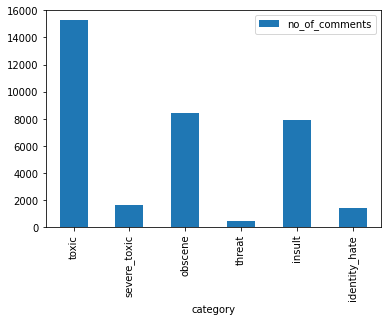

In [9]:
data.plot(x="category", y="no_of_comments", kind="bar")   # plot() uses matplotlib by default

# kindstr
# The kind of plot to produce:
# ‘line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘density’ : same as ‘kde’
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot (DataFrame only)
# ‘hexbin’ : hexbin plot (DataFrame only)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

<BarContainer object of 7 artists>

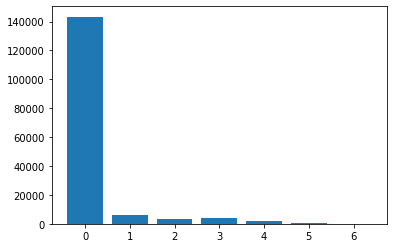

In [11]:
rowsums = df.iloc[:, 2:].sum(axis=1)
# print(rowsums)
import matplotlib.pyplot as plt
plt.bar(rowsums.value_counts().reset_index()["index"],rowsums.value_counts().reset_index()[0])

In [12]:
df.shape

(159571, 8)

In [13]:
rowsums.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [14]:
# https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c -> Basics of CountVectorizer()
from sklearn.feature_extraction.text import CountVectorizer
m1 = CountVectorizer()
x = m1.fit_transform(df["comment_text"])

In [15]:
df["comment_text"]

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [16]:
len(m1.get_feature_names())

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


189775

In [17]:
m1.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000000',
 '0000000027',
 '00000001',
 '00000003',
 '00000050',
 '000001',
 '000002',
 '000002000004000008000016',
 '0000030422',
 '0000035',
 '000023405011',
 '00004',
 '000045',
 '00007632',
 '000080',
 '00008b',
 '00009c',
 '0000z',
 '0001',
 '000111002',
 '00012',
 '000131088',
 '0002tree',
 '0003',
 '000319821',
 '00033',
 '00035',
 '000352',
 '00037',
 '00038',
 '0003º',
 '0004',
 '000500',
 '00052',
 '00053',
 '0006',
 '00075',
 '00098',
 '000_bucks',
 '000b01c5b9f8',
 '000feet',
 '000ft',
 '000http',
 '000hz',
 '000k',
 '000kg',
 '000km',
 '000lb',
 '000poland2',
 '000s',
 '000shp',
 '000soviet',
 '000th',
 '000unknownunknown',
 '000unknownunknownhungary',
 '000unknownunknownitaly',
 '000unknownunknownromania3',
 '000unknownunknowntotal',
 '000v',
 '000x',
 '000z',
 '001',
 '0010',
 '00107',
 '0010steve',
 '0011',
 '001200405140111',
 '00122',
 '00136hg',
 '0014',
 '00144feab7de',
 '0015',
 '00151',
 '0016',
 '00164',


In [18]:
df["comment_text"] = df["comment_text"].str.replace("\d","")
# The special character, \d, matches any digit character.

/var/folders/j7/lj6rcbh97jx8htwtr1mk9km80000gn/T/ipykernel_21996/1358182564.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["comment_text"] = df["comment_text"].str.replace("\d","")


In [19]:
# https://stackabuse.com/using-regex-for-text-manipulation-in-python/
import re
def cleaning(text):
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"\'ll","will", text)
    text = re.sub(r"\'m","am", text)
    text = re.sub("\s+", " ", text) # replace consecutive whitespace characters using the regular expression \s+
    text = re.sub("[^a-zA-Z]", " ", text) # single characters are converted to ' '
    # This regex expression states that match the text string for any alphabets from small a to small z or capital
    # A to capital Z. Adding a + sign after ']' would indicate that string should have at least 1 character.
    text = text.lower()
    return text

# >>> import re
# >>> s = " 2.4       -2.0           4.3"
# >>> re.sub("\s+", ",", s.strip())
# '2.4,-2.0,4.3'

In [20]:
df["comment_text"] = df["comment_text"].apply(cleaning) # Apply a function along an axis of the DataFrame.

In [21]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour iam s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man iam really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can not make any real suggestions on ...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [22]:
import nltk
from nltk.corpus import stopwords
list1 = stopwords.words("english")
list1.extend(['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany',
 'aaaaaaaaaah',
 'aaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaaadm',
 'aaaaaaaaaq',
 'aaaaaaaacfo',
 'aaaaaaaaczy',
 'aaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaari',
 'aaaaaaaayui',
 'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaw',
 'aaaaah',
 'aaaah',
 'aaaannnnyyyywwwwhhhheeeerrrreeee',
 'aaaawwww',
 'aaaboyz',
 'aaages',
 'aaaghh',
 'aaah',
 'aaahhh',
 'aaahs',
 'aaai',
 'aaajade',
 'aaand',
 'aaarrrgggh',
 'aaaww',
 'aab',
 'aaba',])

In [23]:
list1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
df = df.iloc[:10000,:]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
m2 = CountVectorizer(ngram_range=(1,2))
ngram = m2.fit_transform(df["comment_text"].values)
ngram

<10000x300475 sparse matrix of type '<class 'numpy.int64'>'
	with 1017152 stored elements in Compressed Sparse Row format>

In [26]:
print(m2.get_feature_names()[:8])

['aa', 'aa analysis', 'aa at', 'aa background', 'aa bt', 'aa does', 'aa for', 'aa giving']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
count_values = ngram.toarray().sum(axis=0)
print(count_values)

[13  1  1 ...  1  1  1]


In [28]:
vocab = m2.vocabulary_
len(vocab.keys())

300475

In [29]:
vocab

{'explanation': 86443,
 'why': 287966,
 'the': 248440,
 'edits': 78457,
 'made': 148472,
 'under': 271171,
 'my': 161715,
 'username': 275233,
 'hardcore': 107590,
 'metallica': 155436,
 'fan': 88522,
 'were': 284264,
 'reverted': 213458,
 'they': 257622,
 'weren': 284806,
 'vandalisms': 276725,
 'just': 136160,
 'closure': 52749,
 'on': 178112,
 'some': 230020,
 'gas': 99656,
 'after': 5496,
 'voted': 279689,
 'at': 26311,
 'new': 165635,
 'york': 296872,
 'dolls': 74237,
 'fac': 87222,
 'and': 12207,
 'please': 193592,
 'don': 74337,
 'remove': 210335,
 'template': 244332,
 'from': 96891,
 'talk': 242688,
 'page': 186228,
 'since': 226636,
 'iam': 117825,
 'retired': 213060,
 'now': 171050,
 'explanation why': 86489,
 'why the': 288152,
 'the edits': 250321,
 'edits made': 78543,
 'made under': 148669,
 'under my': 271268,
 'my username': 162570,
 'username hardcore': 275248,
 'hardcore metallica': 107595,
 'metallica fan': 155437,
 'fan were': 88554,
 'were reverted': 284670,
 'reve

In [30]:
d2 = pd.DataFrame(sorted([(count_values[j], i) for i, j in vocab.items()],reverse=True)).rename(columns={0:"Frequency",1:"Unigram/Bigram"})

In [31]:
d2

,Frequency,Unigram/Bigram
0,31662,the
1,18877,to
2,14526,you
3,14352,of
4,14121,and
...,...,...
300470,1,aa does
300471,1,aa bt
300472,1,aa background
300473,1,aa at


In [32]:
list(d2[d2["Frequency"]==1]["Unigram/Bigram"])

# Naive Bayes Classifier
# Classification Specific to Text Data - About, Implementation


['zzzz aftah',
 'zzzz',
 'zzyzwicz talk',
 'zzyzwicz',
 'zzpzza correct',
 'zzpzza',
 'zyzzyxrd will',
 'zyzzyxrd',
 'zyuranger dairanger',
 'zyuranger',
 'zwyke tak',
 'zwyke',
 'zweng die',
 'zweng',
 'zwack gb',
 'zwack',
 'zuwandte empoerte',
 'zuwandte',
 'zuse ideas',
 'zuse as',
 'zurich airport',
 'zurich',
 'zun derivative',
 'zun',
 'zumblito these',
 'zumblito',
 'zuma spending',
 'zuma abused',
 'zulu is',
 'zulu',
 'zukav significant',
 'zukav',
 'zuden and',
 'zuden',
 'zuckerbergs the',
 'zuckerbergs',
 'zuckerberg the',
 'zuckerberg social',
 'zuckerberg http',
 'zuckerberg called',
 'zuckerberg and',
 'zuckerberg allegedly',
 'zuck yeah',
 'zuck yea',
 'zuck they',
 'zuck probably',
 'zuck people',
 'zuck just',
 'zuck have',
 'zuck ear',
 'zuck dumb',
 'zuck don',
 'zubrin proposed',
 'zubrin',
 'zu sehen',
 'zu schwarzenburg',
 'zu not',
 'zu for',
 'ztar are',
 'ztar',
 'zrh vandal',
 'zrh',
 'zoroastrian priest',
 'zoroastrian persians',
 'zoroastrian origin',
 'zo

In [33]:
X = df["comment_text"]
Y = df.iloc[:, 2:]

In [34]:
# Splitting the model into 80% Train and 20% Test Data
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=41)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(max_features=1000,
               analyzer="word",
               stop_words="english", norm="l2")

In [36]:
xtrain_tfidf = model.fit_transform(xtrain)
xtest_tfidf = model.transform(xtest)

In [37]:
xtrain_tfidf

<8000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 109794 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of 
# the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size 
# is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to 
# build each tree.

a12 = RandomForestClassifier()
model1 = MultiOutputClassifier(estimator= a12)
model1.fit(xtrain_tfidf, ytrain)
# When data is fitted with an estimator, parameters are estimated from the data at hand. 
# model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X 
# and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single 
# argument, the data X (e.g. model.fit(X)).

MultiOutputClassifier(estimator=RandomForestClassifier())

In [40]:
list3 = Y.columns

In [41]:
from sklearn.metrics import accuracy_score, classification_report
pred = model1.predict(xtrain_tfidf)
# model.predict() : given a trained model, predict the label of a new set of data. 
# This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label 
# for each object in the array.
print("Training Results")
for i in range(len(list3)):
    acc1 = accuracy_score(ytrain.iloc[:, i], pred[:,i])
    print(list3[i]+ "==>", acc1)
    
# sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]
    
# Parameters:
# y_true1d array-like, or label indicator array / sparse matrix
# Ground truth (correct) labels.

# y_pred1d array-like, or label indicator array / sparse matrix
# Predicted labels, as returned by a classifier.



Training Results
toxic==> 0.995125
severe_toxic==> 0.9985
obscene==> 0.99825
threat==> 0.999875
insult==> 0.997
identity_hate==> 0.999


In [51]:
pred

array([[1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [42]:
x_tfidf= model.transform(X)
predicted = model1.predict(x_tfidf)


print(classification_report(Y, predicted, target_names=list3))

               precision    recall  f1-score   support

        toxic       0.96      0.87      0.91       971
 severe_toxic       0.93      0.75      0.83       101
      obscene       0.96      0.90      0.93       527
       threat       0.90      0.85      0.88        33
       insult       0.95      0.86      0.90       494
identity_hate       0.97      0.81      0.88        84

    micro avg       0.95      0.86      0.91      2210
    macro avg       0.94      0.84      0.89      2210
 weighted avg       0.95      0.86      0.91      2210
  samples avg       0.09      0.09      0.09      2210



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [1]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
subm = pd.read_csv('sample_submission.csv')

In [3]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [5]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
subm

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
lens = train.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048923, 5000)

In [9]:
lens

0         264
1         112
2         233
3         622
4          67
         ... 
159566    295
159567     99
159568     81
159569    116
159570    189
Name: comment_text, Length: 159571, dtype: int64

In [10]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
len(train),len(test)

(159571, 153164)

In [12]:
# Filling up empty comments
# COMMENT = 'comment_text'
train['comment_text'].fillna("unknown", inplace=True)
test['comment_text'].fillna("unknown", inplace=True)

In [13]:

import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# We prepare a Term Matrix documentation on the basis of Training data.
# Then we transform the test data on the basis of this matrix formed by the training data vocabulary.
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train['comment_text'])
test_term_doc = vec.transform(test['comment_text'])

In [16]:
# Here we print the Term Matrix Documentation for Training and Test Data 
# Here 159571 determines the number of rows/comments in the Training Data, while 426,005 determines the number of 
# unique words in the Training data
trn_term_doc, test_term_doc

(<159571x426005 sparse matrix of type '<class 'numpy.float64'>'
 	with 17775119 stored elements in Compressed Sparse Row format>,
 <153164x426005 sparse matrix of type '<class 'numpy.float64'>'
 	with 14765768 stored elements in Compressed Sparse Row format>)

In [17]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

# create submission file
submission_binary = pd.read_csv('sample_submission.csv')

for label in label_cols:
    print('... Processing {}'.format(label))
    y = train[label]
    # train the model using X_dtm & y
    logreg.fit(trn_term_doc, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(trn_term_doc)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_term_doc)[:,1]
    submission_binary[label] = test_y_prob

... Processing toxic


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9959015109261707
... Processing severe_toxic


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9979570222659506
... Processing obscene


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9971548714992072
... Processing threat
Training accuracy is 0.9995425233908417
... Processing insult


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.995807508883193
... Processing identity_hate
Training accuracy is 0.9985649021438733


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Finding probability of 
# y is the target variable i.e toxic, severe_toxic etc
# y_i can be 1 or 0 meaning either the comment is toxic (1) or not toxic (0)
def pr(y_i, y): 
    p = x[y==y_i].sum(0)   # example; trn_term_doc[train['toxic']==1] i.e sum of count for each word under toxic comments 
    return (p+1) / ((y==y_i).sum()+1) # 1 limits the infinite possibility of coming across a word 
# (p+1) / ((y==y_i).sum()+1) -> Probability of finding the word under a 'toxic' comment

In [17]:
x = trn_term_doc
test_x = test_term_doc

In [18]:
arr = np.array([[1, 1, 0], [1, 1, 1]]) 
arr.sum(0)
# array([2, 2, 1])

array([2, 2, 1])

In [19]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))  # ratio of Probability a word belongs to a Toxic Comment divided by Probability a word belongs to a Non-Toxic Comment
    m = LogisticRegression(C=4, dual=False) # dual=False when n_samples > n_features
    x_nb = x.multiply(r)   
    return m.fit(x_nb, y), r

In [20]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit toxic


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fit severe_toxic


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fit obscene


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fit threat
fit insult


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fit identity_hate


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
submid = pd.DataFrame({'id': subm["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)
submission.to_csv('submission.csv', index=False)

In [22]:
submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999988,0.109154,0.999987,0.002340,0.962815,0.095172
1,0000247867823ef7,0.002826,0.000587,0.001864,0.000089,0.002210,0.000331
2,00013b17ad220c46,0.011707,0.000842,0.005558,0.000090,0.003182,0.000288
3,00017563c3f7919a,0.000956,0.000220,0.001142,0.000157,0.001062,0.000291
4,00017695ad8997eb,0.009922,0.000464,0.001988,0.000115,0.002383,0.000339
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.588809,0.000294,0.066990,0.000110,0.018685,0.000366
153160,fffd7a9a6eb32c16,0.017687,0.001031,0.019660,0.001073,0.018748,0.001581
153161,fffda9e8d6fafa9e,0.001367,0.000154,0.002661,0.000070,0.000934,0.000187
153162,fffe8f1340a79fc2,0.007988,0.000328,0.002250,0.000087,0.002189,0.000859


In [23]:
submission.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,0.199973,0.012875,0.112378,0.002492,0.082826,0.010945
std,0.351471,0.081021,0.278280,0.039260,0.224174,0.078703
min,0.000007,0.000010,0.000054,0.000004,0.000009,0.000008
25%,0.002986,0.000214,0.001615,0.000086,0.001355,0.000274
50%,0.009391,0.000357,0.002997,0.000109,0.003013,0.000403
75%,0.161818,0.000838,0.014056,0.000175,0.015212,0.000907
max,1.000000,0.999979,1.000000,0.999997,1.000000,1.000000
